In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


How many rows and columns are in gdp_df? What are the data types of each column?

In [6]:
gdp_df.shape

(8219, 4)

In [7]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [8]:
print(type('Country or Area'))
print(type('Year'))
print(type('Value'))
print(type('Value Footnotes'))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [11]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [14]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [23]:
all_years = gdp_df.Country.value_counts()
type(all_years)
all_years = all_years.to_frame()
type(all_years)
all_years = all_years.reset_index()
all_years
all_years.columns = ['Country', 'Num_Years']
all_years
all_years_countries = all_years.loc[all_years.Num_Years == 34]
all_years_countries.shape

(228, 2)

In [25]:
few_years_countries = all_years.loc[all_years.Num_Years < 15]
few_years_countries.shape

(2, 2)

In [27]:
year_counts = gdp_df.Year.value_counts()
year_counts = year_counts.to_frame()
year_counts.sort_values(by = 'Year', ascending = False)

,count
Year,
2023,240
2022,246
2021,247
2020,247
2019,247
2018,247
2017,247
2016,247
2015,247


In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [30]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


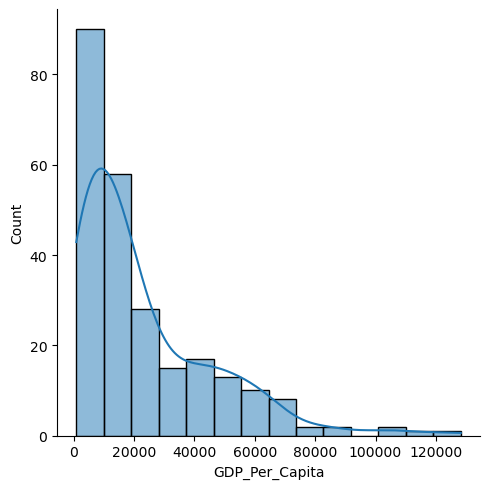

In [32]:
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )
# Makes a pretty straightforward count of instances for each GDP_Per_Capita. Easy to look at and understand.

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

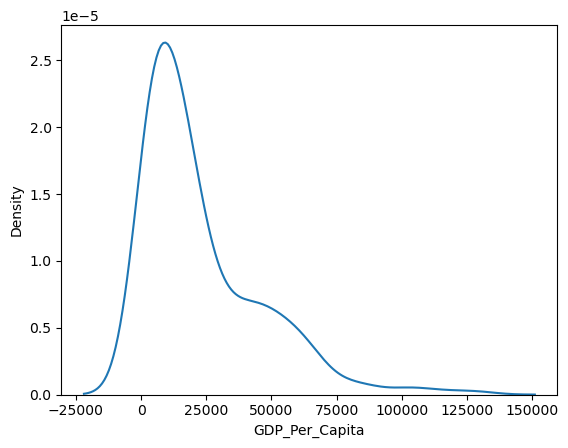

In [34]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
# Looks similar to the hisogram, but measures distribution density instead of just value. We can more easily see where the majority of GDP values fall.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

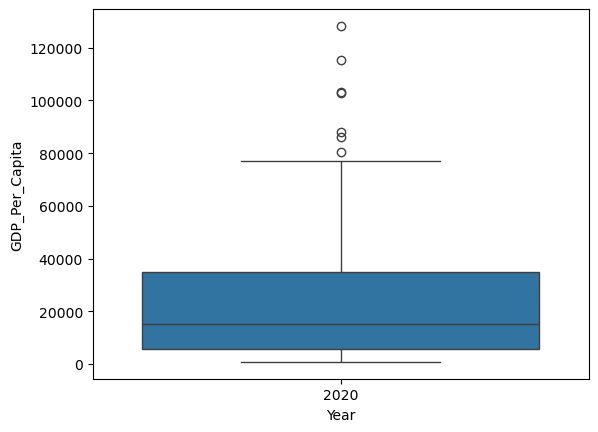

In [36]:
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )
# Not as easily readible to me because of general unfamiliarity, but it looks to show outliers very well compared to majority distribution.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

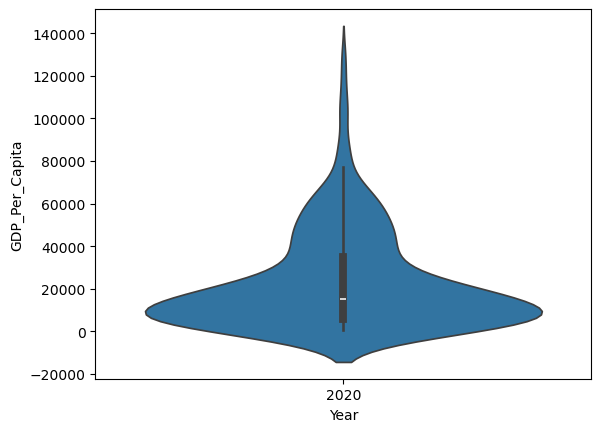

In [38]:
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])
# Similar to the others in showing the distribution through a symmetrical shape. Basically a desnsity graph reflected and sideways.

What was the median GDP per capita value in 2020?

In [41]:
gdp_2020.describe()
# Mediam GDP 2020: ~15309.24

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

A scatterplot

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [44]:
decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

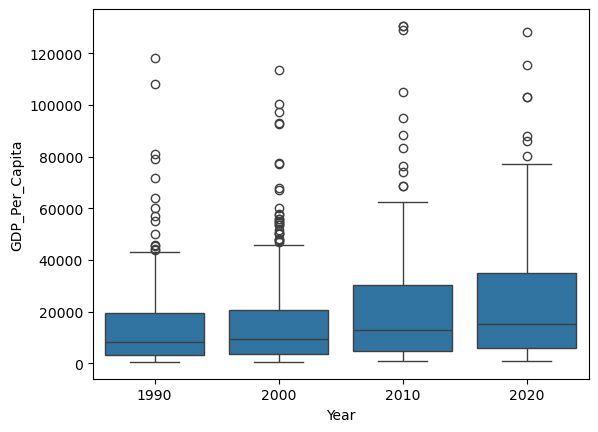

In [46]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
# Really great way to seek outliers compared to general distribution. It's clear that over time, general GDP has increased slightly, but there's always been significant outliers.

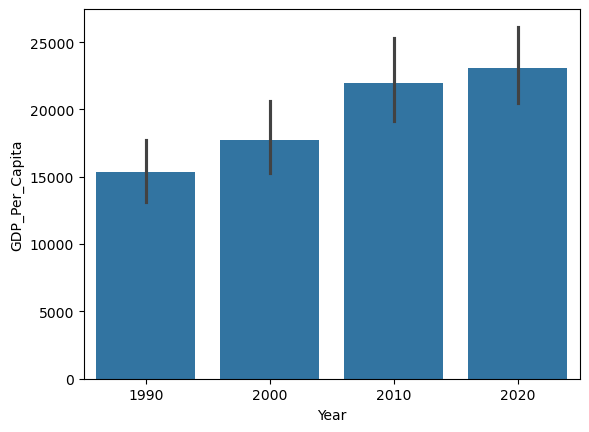

In [48]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)
plt.show()
# More straightforward, gives clear results and general information. Doesn't give the details on outliers like the boxplot does, though, just averages.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

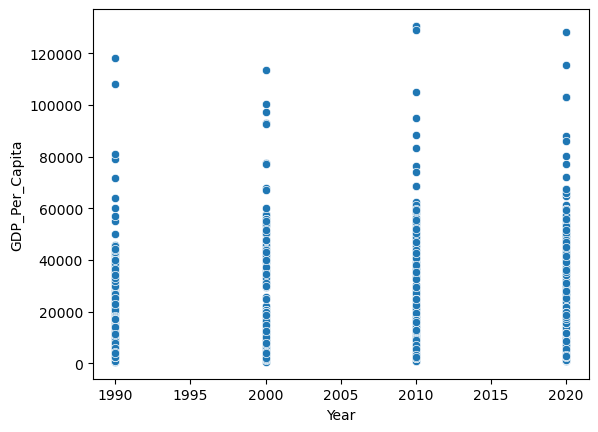

In [50]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
# not the best use of a scatterplot in this. Maybe if it were with more years, or maybe trying to relate GDP with another value, but scatterplots don't work great with timelines.

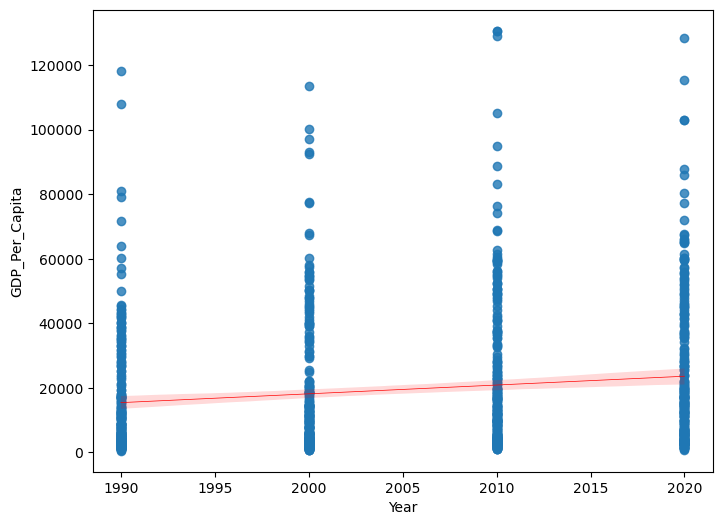

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 0.5},
    ax=ax
)
plt.show()
# same as above, scatterplots aren't the greatest when it comes to visualization over time. You can see what's happening, but its no different from a boxplot. The trend line gives a little more info about general distribution, though.

Which country was the first to have a GDP per capita greater than $100,000?

In [55]:
gdp_100k = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]
gdp_100k

,Country,Year,GDP_Per_Capita
750,Bermuda,2011,101174.504104
751,Bermuda,2010,105121.639689
752,Bermuda,2009,108091.644563
753,Bermuda,2008,115015.749469
754,Bermuda,2007,117742.118950
...,...,...,...
7821,United Arab Emirates,1996,100563.698291
7822,United Arab Emirates,1995,101412.082063
7825,United Arab Emirates,1992,101100.487512
7826,United Arab Emirates,1991,103098.537132


In [57]:
gdp_100k = gdp_100k.sort_values(by = 'Year', ascending = True)
gdp_100k.head(1)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [60]:
gdp_2020_max = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)
gdp_2020_max.head(1)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

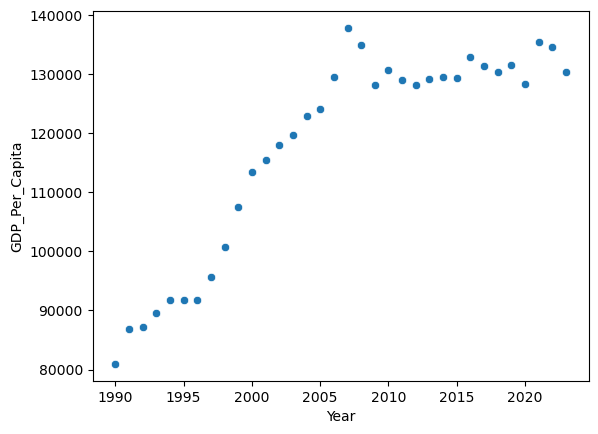

In [62]:
gdp_Luxe = gdp_df.loc[gdp_df.Country == 'Luxembourg']
gdp_Luxe
# sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_Luxe)
# plt.show()
sns.scatterplot(x=gdp_Luxe["Year"], y=gdp_Luxe["GDP_Per_Capita"])

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [65]:
gdp_2020_min = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)
gdp_2020_min.head(1)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

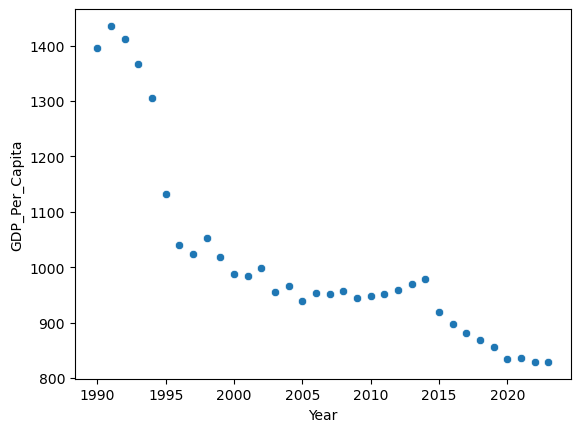

In [67]:
gdp_Buru = gdp_df.loc[gdp_df.Country == 'Burundi']
gdp_Buru
sns.scatterplot(x=gdp_Buru["Year"], y=gdp_Buru["GDP_Per_Capita"])

Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [70]:
compare_list = [1990, 2020]
gdp_2020_1990 = gdp_df.loc[gdp_df.Year.isin(compare_list)]
gdp_2020yr = gdp_2020_1990[gdp_2020_1990.Year == 2020]
gdp_2020yr
gdp_1990yr = gdp_2020_1990[gdp_2020_1990.Year == 1990]
gdp_1990yr
gdp_1990_2020 = pd.merge(gdp_2020yr, gdp_1990yr, 
                               left_on = 'Country', right_on = 'Country', 
                               how = 'inner')
gdp_1990_2020.columns = ['Country', '2020', 'GDP_2020', '1990', 'GDP_1990']
gdp_1990_2020['GDP_diff'] = gdp_1990_2020.GDP_2020 - gdp_1990_2020.GDP_1990
gdp_1990_2020.sort_values(by = 'GDP_diff', ascending = True)
gdp_2020_lesser = gdp_1990_2020.loc[gdp_1990_2020.GDP_diff < 0]
gdp_2020_lesser
# Yes, that seems true. Looking at the graphs from Q.10, we can see that countries averaged higher GDP in 2020 after a steady rise from 1990. 24 countries had lower GDP in 2020 compared to 1990.

,Country,2020,GDP_2020,1990,GDP_1990,GDP_diff
10,Aruba,2020,28521.688852,1990,34579.220640,-6057.531788
16,Barbados,2020,15749.038017,1990,16976.761648,-1227.723631
27,Brunei,2020,80280.897948,1990,118163.683198,-37882.785250
30,Burundi,2020,833.920257,1990,1396.077627,-562.157369
37,Central African Republic,2020,1136.570530,1990,1481.252551,-344.682021
44,Congo,2020,6350.509134,1990,8699.526839,-2349.017705
49,Dem. Rep. Congo,2020,1277.632863,1990,2172.001597,-894.368734
71,Fragile and conflict affected situations,2020,5271.014406,1990,6062.707946,-791.693539
73,Gabon,2020,18681.484074,1990,23884.810700,-5203.326626
84,Haiti,2020,3229.475544,1990,3946.365646,-716.890102


Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [58]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.6,1
1,Afghanistan,2018,16.8,2
2,Afghanistan,2017,13.5,3
3,Afghanistan,2016,11,4
4,Afghanistan,2015,8.26,4
...,...,...,...,...
6376,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6377,294,Preliminary. Country estimate.,NaN,NaN
6378,295,18+. ITU estimate.,NaN,NaN
6379,296,ICT survey. Population age 11+,NaN,NaN


In [56]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [78]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


Look at the number of observations in this dataset per year. What do you notice?

In [81]:
internet_years = internet_df.Year.value_counts()
internet_years = internet_years.to_frame()
internet_years = internet_years.sort_values(by = 'Year', ascending = False)
internet_years
# While there's been a little fluctuation, overall its been a steady rise in entries since the 90s, save for 1990 and 2023 themselves which seem to be drmatic outliers.

,count
Year,
2023,11
2022,184
2021,186
2020,186
2019,185
2018,174
2017,205
2016,206
2015,203


What is the first year to have a non-zero internet users percentage value?

In [84]:
internet_df
non_0_users = internet_df.loc[internet_df.Internet_Users_Pct > 0.00]
non_0_users = non_0_users.sort_values(by = 'Year', ascending = True)
non_0_users.head(1)
# Denmark in 1990 at 9%

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277


How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

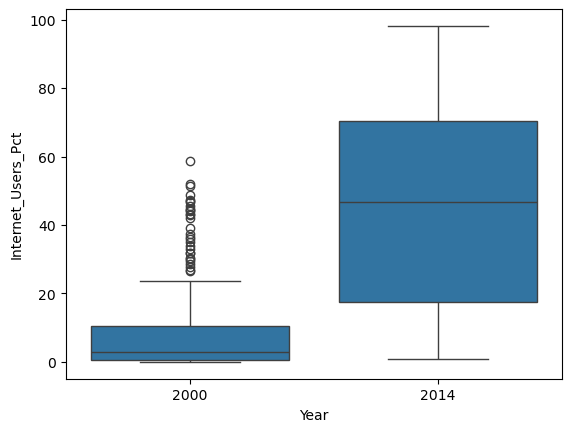

In [87]:
# internet_2000 = internet_df.loc[internet_df.Year == 2000]
# internet_2000
internet_2014 = internet_df.loc[internet_df.Year == 2014]
internet_2014
# internet_2000_2014 = pd.merge( internet_2000, internet_2014, 
#                               left_on = 'Country', right_on = 'Country', 
#                                how = 'inner')
# internet_2000_2014.columns = ['Country', '2000', 'Internet_Pct_2000', '2014', 'Internet_Pct_2014']
# internet_2000_2014

internet_years = [2000, 2014]
internet_2000_2014 = internet_df.loc[internet_df.Year.isin(internet_years)]
internet_2000_2014
sns.boxplot(x=internet_2000_2014["Year"], y=internet_2000_2014["Internet_Users_Pct"])
# Definitely a higher and greater distribution in 2014 compared to 2000, but interestingly enough, no outliers in 2014.

For how many countries was the percentage of internet users below 5% in 2014?

In [90]:
# internet_2014 = internet_df.loc[internet_df.Year == 2014]
# internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head()
internet_2014_5pct = internet_2014.loc[internet_2014.Internet_Users_Pct < 5.0]
internet_2014_5pct.shape
# 10 countries below 5% in 2014

(10, 3)

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [283]:
internet_df
gdp_df
gdp_and_internet_use = pd.concat([gdp_df, internet_df])
gdp_and_internet_use = gdp_and_internet_use.reset_index(drop = True)
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
14297,Zimbabwe,1997,NaN,0.033080
14298,Zimbabwe,1996,NaN,0.016790
14299,Zimbabwe,1995,NaN,0.007684
14300,Zimbabwe,1994,NaN,0.001739


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [157]:
gdp_and_internet_use_highest = gdp_and_internet_use.loc[gdp_and_internet_use.Year ==2014]
gdp_and_internet_use_highest.sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10811,Iceland,2014,NaN,98.158
10112,Falkland (Malvinas) Islands,2014,NaN,97.600
8821,Bermuda,2014,NaN,96.800


In [187]:
countries_list = ['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda']
gi_use_highest = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(countries_list)]
gi_use_highest['Country'].value_counts(dropna = False)
gi_use_highest[gi_use_highest['Country']=='Falkland (Malvinas) Islands'].head(23)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10110,Falkland (Malvinas) Islands,2016,NaN,99.01520
10111,Falkland (Malvinas) Islands,2015,NaN,98.30510
10112,Falkland (Malvinas) Islands,2014,NaN,97.60000
10113,Falkland (Malvinas) Islands,2013,NaN,96.90000
10114,Falkland (Malvinas) Islands,2012,NaN,96.92300
10115,Falkland (Malvinas) Islands,2011,NaN,96.38000
10116,Falkland (Malvinas) Islands,2010,NaN,95.84000
10117,Falkland (Malvinas) Islands,2009,NaN,95.84000
10118,Falkland (Malvinas) Islands,2008,NaN,92.96000
10119,Falkland (Malvinas) Islands,2007,NaN,90.06000


In [161]:
# gdp_internet_plot = sns.FacetGrid(gi_use_highest, col = "Year", row = "GDP_Per_Capita")
# gdp_internet_plot.map(sns.scatterplot, "Country", "GDP_Per_Capita")
# g = sns.FacetGrid(tips, col="time",  row="sex")
# g.map_dataframe(sns.histplot, x="total_bill")
g

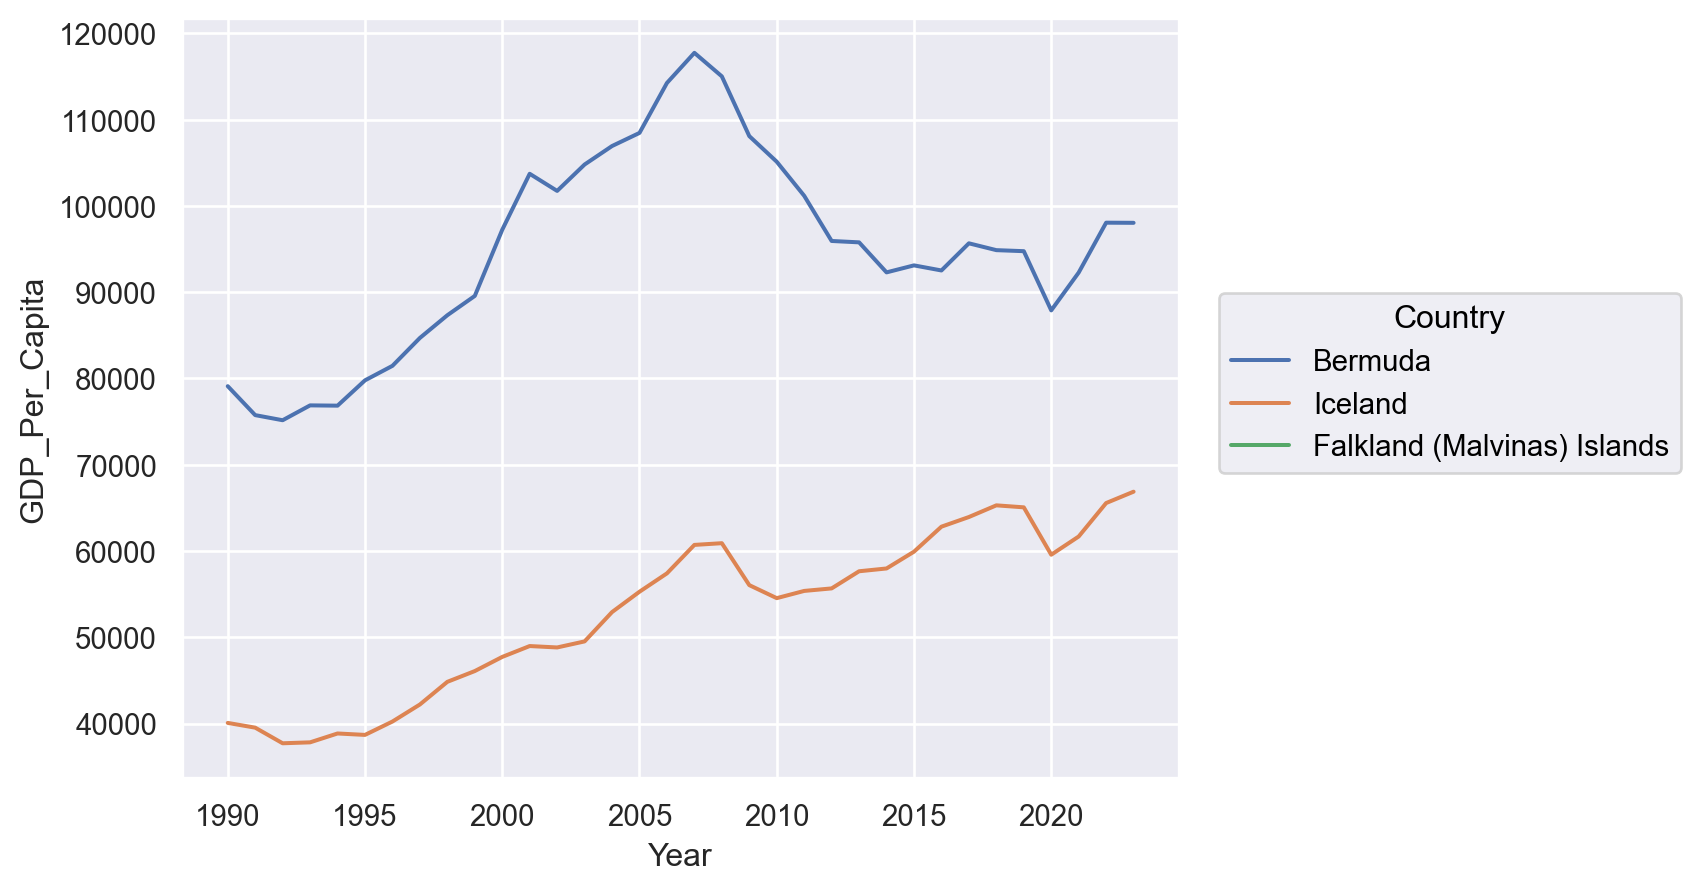

In [219]:
# gdp_internet_plot = sns.FacetGrid(gi_use_highest, col="Country")
# gdp_internet_plot.map_dataframe(sns.histplot, x="Year", y="GDP_Per_Capita")
# gdp_internet_plot = sns.FacetGrid(gi_use_highest, col="Country")
# gdp_internet_plot.map_dataframe(sns.histplot, x="Year", y="GDP_Per_Capita")
gdp_internet_plot = so.Plot(gi_use_highest, "Year", "GDP_Per_Capita", color="Country")
gdp_internet_plot.add(so.Line(), so.Agg())

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [289]:
gdp_and_internet_use_2014 = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='left')
gdp_and_internet_use_2014
gdp_and_internet_use_2014 = gdp_and_internet_use_2014[gdp_and_internet_use_2014['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2014,3017.942544,7.0000
33,Africa Eastern and Southern,2014,4052.851526,NaN
67,Africa Western and Central,2014,4816.917355,NaN
101,Albania,2014,12788.747231,54.3000
135,Algeria,2014,15073.762940,29.5000
...,...,...,...,...
8074,Virgin Islands,2014,42853.898660,NaN
8096,West Bank and Gaza,2014,5990.426615,NaN
8126,World,2014,17307.606891,NaN
8160,Zambia,2014,3585.577485,6.5000


Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

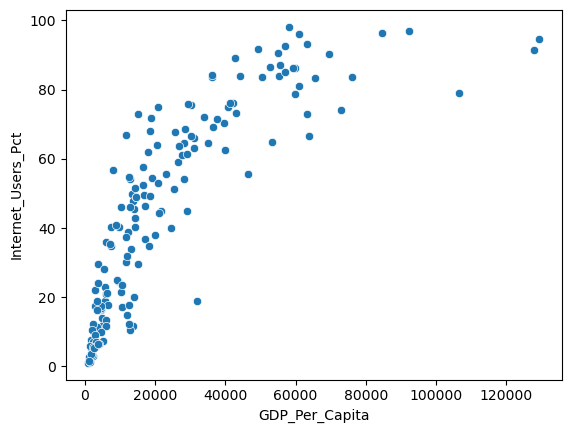

In [291]:
sns.scatterplot(x=gdp_and_internet_use_2014["GDP_Per_Capita"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])
# There are definitely some outliers to the main curve of the plot.

In [295]:
gdp_and_internet_use_2014_outlier = gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] > 80000]
gdp_and_internet_use_2014_outlier

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
747,Bermuda,2014,92298.387811,96.8000
950,Brunei,2014,83310.615064,NaN
4432,Luxembourg,2014,129443.183641,94.6702
4466,"Macao SAR, China",2014,162582.374111,NaN
5547,Norway,2014,84753.668395,96.3005
6125,Qatar,2014,128013.987046,91.4900
6520,Singapore,2014,106604.492771,79.0292


Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [353]:
gdp_per_capita_2014 = gdp_df[gdp_df['Year']==2014]
gdp_per_capita_2014
gdp_per_capita_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, 3, labels=["Low", "Medium", "High"])
gdp_per_capita_2014
# for ind, row in gdp_per_capita_2014.iterrows():
#         if row[
# for ind, row in people_df.iterrows():
#     if row['sibling_count'] == 0:
#         people_df.loc[ind, 'birth_category'] = 'only'
#     elif row['birth_order'] == 1:
#         people_df.loc[ind, 'birth_category'] ='oldest'
#     elif row['birth_order'] > row['sibling_count']:
#         people_df.loc[ind, 'birth_category'] ='youngest'
#     else:
#         people_df.loc[ind, 'birth_category'] ='middle'

C:\Users\isiyb\AppData\Local\Temp\ipykernel_15452\1061508499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, 3, labels=["Low", "Medium", "High"])


,Country,Year,GDP_Per_Capita,GDP_group
9,Afghanistan,2014,3017.942544,Low
33,Africa Eastern and Southern,2014,4052.851526,Low
67,Africa Western and Central,2014,4816.917355,Low
101,Albania,2014,12788.747231,Medium
135,Algeria,2014,15073.762940,Medium
...,...,...,...,...
8074,Virgin Islands,2014,42853.898660,High
8096,West Bank and Gaza,2014,5990.426615,Low
8126,World,2014,17307.606891,Medium
8160,Zambia,2014,3585.577485,Low


Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [356]:
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,GDP_group
9,Afghanistan,2014,3017.942544,Low
33,Africa Eastern and Southern,2014,4052.851526,Low
67,Africa Western and Central,2014,4816.917355,Low
101,Albania,2014,12788.747231,Medium
135,Algeria,2014,15073.762940,Medium
...,...,...,...,...
8074,Virgin Islands,2014,42853.898660,High
8096,West Bank and Gaza,2014,5990.426615,Low
8126,World,2014,17307.606891,Medium
8160,Zambia,2014,3585.577485,Low


In [362]:
gdp_per_capita_2014_m = pd.merge(gdp_per_capita_2014, internet_df, on=['Country', 'Year'], how='left')
gdp_per_capita_2014_m

,Country,Year,GDP_Per_Capita,GDP_group,Internet_Users_Pct
0,Afghanistan,2014,3017.942544,Low,7.0000
1,Africa Eastern and Southern,2014,4052.851526,Low,NaN
2,Africa Western and Central,2014,4816.917355,Low,NaN
3,Albania,2014,12788.747231,Medium,54.3000
4,Algeria,2014,15073.762940,Medium,29.5000
...,...,...,...,...,...
242,Virgin Islands,2014,42853.898660,High,NaN
243,West Bank and Gaza,2014,5990.426615,Low,NaN
244,World,2014,17307.606891,Medium,NaN
245,Zambia,2014,3585.577485,Low,6.5000


In [394]:
gdp_per_capita_2014_low = gdp_per_capita_2014_m[gdp_per_capita_2014_m['GDP_group']=='Low']
gdp_per_capita_2014_med = gdp_per_capita_2014_m[gdp_per_capita_2014_m['GDP_group']=='Medium']
gdp_per_capita_2014_high = gdp_per_capita_2014_m[gdp_per_capita_2014_m['GDP_group']=='High']
low_median = [gdp_per_capita_2014_low['Internet_Users_Pct'].median()]
med_median = [gdp_per_capita_2014_med['Internet_Users_Pct'].median()]
high_median = [gdp_per_capita_2014_high['Internet_Users_Pct'].median()]
dict = {'low_median': low_median, 'med_median': med_median, 'high_median': high_median}
median_compare = pd.DataFrame(dict)
median_compare

,low_median,med_median,high_median
0,11.6,44.5945,75.98
